In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('dataset/books.csv')
users = pd.read_csv('dataset/users.csv')
ratings = pd.read_csv('dataset/ratings.csv')
genres = pd.read_csv('dataset/Dataset.csv')

# Books - Preprocessing

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [5]:
books["Year-Of-Publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [6]:
books.loc[books["Year-Of-Publication"] == 'DK Publishing Inc', :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [7]:
books.loc[books["ISBN"] == "0789466953", "Year-Of-Publication"] = 2000
books.loc[books["ISBN"] == "0789466953", "Book-Author"] = 'James Buckley Jr'
books.loc[books["ISBN"] == "0789466953", "Publisher"] = 'DK Publishing Inc'
books.loc[books["ISBN"] == "0789466953", "Book-Title"] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers'

In [8]:
books.loc[books["ISBN"] == "078946697X", "Year-Of-Publication"] = 2000
books.loc[books["ISBN"] == "078946697X", "Book-Author"] = 'Michael Teitelbaum'
books.loc[books["ISBN"] == "078946697X", "Publisher"] = 'DK Publishing Inc'
books.loc[books["ISBN"] == "078946697X", "Book-Title"] = 'DK Readers: The Story of the X-Men, How It All Began (Level 4: Proficient Readers)'

In [9]:
books.loc[books["Year-Of-Publication"] == 'Gallimard', :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [10]:
books.loc[books["ISBN"] == "2070426769", "Year-Of-Publication"] = 2003
books.loc[books["ISBN"] == "2070426769", "Book-Author"] = 'Jean-Marie Gustave Le Clezio'
books.loc[books["ISBN"] == "2070426769", "Publisher"] = 'Gallimard'
books.loc[books["ISBN"] == "2070426769", "Book-Title"] = 'Peuple du ciel, suivi de Les Bergers'

In [11]:
books.loc[books.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [12]:
books.loc[books["ISBN"] == "193169656X", "Publisher"] = "Other"
books.loc[books["ISBN"] == "1931696993", "Publisher"] = "Other"

# Users PreProcessing

In [13]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [14]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [15]:
users.loc[(users.Age > 90) | (users.Age < 6), 'Age'] = np.nan
users.Age = users.Age.fillna(users.Age.mean())
users.Age = users.Age.astype(np.int32)
#All ages below 6 and above 90 are converted NaN and replaced with mean age of the users.
#Data type of age converted to int32

In [16]:
print(sorted(users.Age.unique()))

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


# Rating PreProcessing

In [17]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [18]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [19]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


# Popularity Based Recommendation 

In [20]:
ratings_with_name = ratings.merge(books,on='ISBN')
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [21]:
num_ratings_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_ratings_df.rename(columns={'Book-Rating':'No_of_Ratings'},inplace=True)
num_ratings_df

,Book-Title,No_of_Ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [22]:
avg_ratings_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_ratings_df.rename(columns={'Book-Rating':'Avg_Ratings'},inplace=True)
avg_ratings_df

,Book-Title,Avg_Ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [23]:
popular_df = num_ratings_df.merge(avg_ratings_df,on='Book-Title')
popular_df

,Book-Title,No_of_Ratings,Avg_Ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [24]:
popular_df = popular_df[(popular_df['No_of_Ratings']>=250) & (popular_df['Avg_Ratings']>3)]
popular_df.sort_values('Avg_Ratings',ascending=False).head(50)
popular_df
# Top 50 popular books that will be recommended to all users 

,Book-Title,No_of_Ratings,Avg_Ratings
764,1984,284,4.454225
818,1st to Die: A Novel,509,3.575639
1048,2nd Chance,356,3.269663
1760,A Bend in the Road,346,3.364162
2281,"A Child Called \It\"": One Child's Courage to S...",265,4.086792
...,...,...,...
230246,Watership Down,312,3.698718
233370,Where the Heart Is (Oprah's Book Club (Paperba...,585,4.105983
233850,White Oleander : A Novel,387,3.506460
233851,White Oleander : A Novel (Oprah's Book Club),356,3.772472


In [25]:
popular_rec = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Year-Of-Publication','No_of_Ratings','Avg_Ratings']]
popular_rec.head(15)

,Book-Title,Book-Author,Year-Of-Publication,No_of_Ratings,Avg_Ratings
0,1984,George Orwell,1990,284,4.454225
9,1st to Die: A Novel,James Patterson,2002,509,3.575639
11,2nd Chance,James Patterson,2002,356,3.269663
15,A Bend in the Road,Nicholas Sparks,2001,346,3.364162
21,"A Child Called \It\"": One Child's Courage to S...",Dave Pelzer,1995,265,4.086792
23,A Heartbreaking Work of Staggering Genius,Dave Eggers,2001,302,3.423841
24,A Painted House,John Grisham,2001,838,3.231504
29,A Prayer for Owen Meany,John Irving,1990,413,3.796610
31,A Time to Kill,JOHN GRISHAM,1992,549,3.122040
38,A Walk to Remember,Nicholas Sparks,2000,378,3.399471


In [26]:
def popularity_recommender(n):
    popular=popular_df.sort_values('Avg_Ratings',ascending=False).head(n)['Book-Title']
    popular= popular.values.tolist()
    return popular

In [27]:
popularity_recommender(5)

['Harry Potter and the Prisoner of Azkaban (Book 3)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 "Harry Potter and the Sorcerer's Stone (Book 1)",
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Harry Potter and the Chamber of Secrets (Book 2)']

# Collaborative Filtering Based Recommendation 

In [28]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 50
experienced_users = x[x].index

In [29]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(experienced_users)]

In [30]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [31]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_ratings.rename(columns = {'Book-Title':'title'}, inplace = True)
final_ratings.rename(columns = {'User-ID':'userid'}, inplace = True)
final_ratings

,userid,ISBN,Book-Rating,title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
64,638,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
67,8253,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1029756,274004,037572799X,0,In Pursuit of the Proper Sinner,Elizabeth George,2000,Random House Large Print Publishing,http://images.amazon.com/images/P/037572799X.0...,http://images.amazon.com/images/P/037572799X.0...,http://images.amazon.com/images/P/037572799X.0...
1029947,274061,1551663147,10,Fever,Elizabeth Lowell,1997,Mira,http://images.amazon.com/images/P/1551663147.0...,http://images.amazon.com/images/P/1551663147.0...,http://images.amazon.com/images/P/1551663147.0...
1030363,274808,0449701913,0,Homecoming,Cynthia Voigt,1983,Fawcett Books,http://images.amazon.com/images/P/0449701913.0...,http://images.amazon.com/images/P/0449701913.0...,http://images.amazon.com/images/P/0449701913.0...
1030824,275970,0865714215,0,Stormy Weather,Guy Dauncey,2001,New Society Publishers,http://images.amazon.com/images/P/0865714215.0...,http://images.amazon.com/images/P/0865714215.0...,http://images.amazon.com/images/P/0865714215.0...


In [32]:
pt = final_ratings.pivot_table(index='title',columns='userid',values='Book-Rating').fillna(0)
pt

userid,243,254,507,638,643,741,882,929,1211,1424,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
print(pt.iloc[280:320])

userid                                              243     254     507     \
title                                                                        
Disclosure                                             0.0     0.0     0.0   
Divine Secrets of the Ya-Ya Sisterhood : A Novel       0.0     0.0     0.0   
Divine Secrets of the Ya-Ya Sisterhood: A Novel        0.0     0.0     0.0   
Dolores Claiborne                                      0.0     0.0     0.0   
Don't Stand Too Close to a Naked Man                   0.0     0.0     0.0   
Don't Sweat the Small Stuff and It's All Small ...     0.0     0.0     0.0   
Doomsday Book                                          0.0     0.0     0.0   
Downtown                                               0.0     0.0     0.0   
Dr. Atkins' New Diet Revolution                        0.0     0.0     0.0   
Dr. Death (Alex Delaware Novels (Paperback))           0.0     0.0     0.0   
Dragon Tears                                           0.0     0

In [34]:
from scipy.sparse import csr_matrix
book_sparse=csr_matrix(pt)

In [35]:
type(book_sparse)

scipy.sparse.csr.csr_matrix

In [36]:
from sklearn.neighbors import NearestNeighbors
model_knn=NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors=10, n_jobs=-1)
model_knn.fit(book_sparse)
print(model_knn)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=10)


In [37]:
def merge(list1, list2):
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
    return merged_list

def collaborative_based_recommender(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    distances, indices = model_knn.kneighbors(pt.iloc[index,:].values.reshape(1, -1))
    return merge(indices.flatten()[1:],pt.index[indices.flatten()][1:])


In [38]:
collaborative_based_recommender('1984')

[(90, 'Animal Farm'),
 (156, 'Brave New World'),
 (76, 'American Psycho (Vintage Contemporaries)'),
 (1216, 'The Vampire Lestat (Vampire Chronicles, Book II)'),
 (828,
  "Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death"),
 (1250, 'Timeline'),
 (1040, "The Handmaid's Tale"),
 (905, 'The Autobiography of Malcolm X'),
 (949, 'The Catcher in the Rye')]

# Content Based Recommendation

In [39]:
genres.head()

,Book-Title,author,rating,description,isbn,genres,numRatings,ratingsByStars,coverImg
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,9.78E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",6376780,"['3444695', '1921313', '745221', '171994', '93...",https://i.gr-assets.com/images/S/compressed.ph...
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,9.78E+12,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",2507623,"['1593642', '637516', '222366', '39573', '14526']",https://i.gr-assets.com/images/S/compressed.ph...
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,1.00E+13,"['Classics', 'Fiction', 'Historical Fiction', ...",4501075,"['2363896', '1333153', '573280', '149952', '80...",https://i.gr-assets.com/images/S/compressed.ph...
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,1.00E+13,"['Classics', 'Fiction', 'Romance', 'Historical...",2998241,"['1617567', '816659', '373311', '113934', '767...",https://i.gr-assets.com/images/S/compressed.ph...
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,9.78E+12,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",https://i.gr-assets.com/images/S/compressed.ph...


In [40]:
genre_based = genres.merge(books,on="Book-Title").drop_duplicates('Book-Title')[['Book-Title', 'genres','description','author']]
genre_based.shape

(9767, 4)

In [41]:
genre_based.isnull().sum()

Book-Title      0
genres          0
description    81
author          0
dtype: int64

In [42]:
genre_based.dropna(axis=0, how="any", inplace=True)
genre_based.isnull().shape

(9686, 4)

In [43]:
genre_based.head()

,Book-Title,genres,description,author
0,To Kill a Mockingbird,"['Classics', 'Fiction', 'Historical Fiction', ...",The unforgettable novel of a childhood in a sl...,Harper Lee
8,Pride and Prejudice,"['Classics', 'Fiction', 'Romance', 'Historical...",Alternate cover edition of ISBN 9780679783268S...,"Jane Austen, Anna Quindlen (Introduction)"
26,Twilight,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",About three things I was absolutely positive.\...,Stephenie Meyer
38,Animal Farm,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",Librarian's note: There is an Alternate Cover ...,"George Orwell, Russell Baker (Preface), C.M. W..."
58,The Chronicles of Narnia,"['Fantasy', 'Classics', 'Fiction', 'Young Adul...","Journeys to the end of the world, fantastic cr...","C.S. Lewis, Pauline Baynes (Illustrator)"


In [44]:
genre_based['Book-Title'][26]
genre_based['description'][26]

"About three things I was absolutely positive.\n\nFirst, Edward was a vampire.\n\nSecond, there was a part of him—and I didn't know how dominant that part might be—that thirsted for my blood.\n\nAnd third, I was unconditionally and irrevocably in love with him.\n\nDeeply seductive and extraordinarily suspenseful, Twilight is a love story with bite."

<AxesSubplot:title={'center':'Word Count Distribution for book descriptions'}, ylabel='Frequency'>

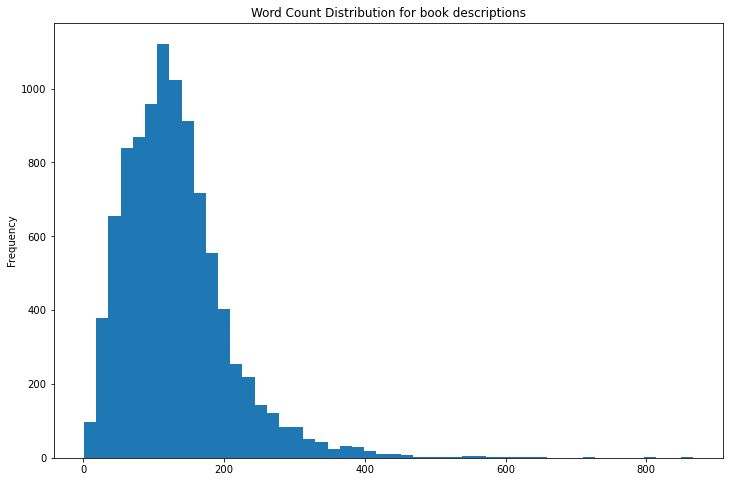

In [45]:
genre_based['word_count'] = genre_based['description'].apply(lambda x: len(str(x).split()))# Plotting the word count
genre_based['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions')

In [46]:
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for converting into lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Applying all the functions in description and storing as a cleaned_desc
genre_based['cleaned_desc'] = genre_based['description'].apply(_removeNonAscii)
genre_based['cleaned_desc'] = genre_based.cleaned_desc.apply(func = make_lower_case)
genre_based['cleaned_desc'] = genre_based.cleaned_desc.apply(func = remove_stop_words)
genre_based['cleaned_desc'] = genre_based.cleaned_desc.apply(func=remove_punctuation)
genre_based['cleaned_desc'] = genre_based.cleaned_desc.apply(func=remove_html)

genre_based

,Book-Title,genres,description,author,word_count,cleaned_desc
0,To Kill a Mockingbird,"['Classics', 'Fiction', 'Historical Fiction', ...",The unforgettable novel of a childhood in a sl...,Harper Lee,137,unforgettable novel childhood sleepy southern ...
8,Pride and Prejudice,"['Classics', 'Fiction', 'Romance', 'Historical...",Alternate cover edition of ISBN 9780679783268S...,"Jane Austen, Anna Quindlen (Introduction)",100,alternate cover edition isbn 9780679783268sinc...
26,Twilight,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",About three things I was absolutely positive.\...,Stephenie Meyer,55,three things absolutely positive first edward ...
38,Animal Farm,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",Librarian's note: There is an Alternate Cover ...,"George Orwell, Russell Baker (Preface), C.M. W...",123,librarian s note alternate cover edition editi...
58,The Chronicles of Narnia,"['Fantasy', 'Classics', 'Fiction', 'Young Adul...","Journeys to the end of the world, fantastic cr...","C.S. Lewis, Pauline Baynes (Illustrator)",178,journeys end world fantastic creatures epic ba...
...,...,...,...,...,...,...
27184,The Nightingale's Song,"['History', 'Nonfiction', 'War', 'Military Fic...",Robert Timberg weaves together the lives of An...,Robert Timberg,83,robert timberg weaves together lives annapolis...
27186,The Conservationist,"['Fiction', 'Africa', 'South Africa', 'Nobel P...",Mehring is rich. He has all the privileges and...,Nadine Gordimer,52,mehring rich privileges possessions south afri...
27187,Vacuum Flowers,"['Science Fiction', 'Cyberpunk', 'Fiction', 'S...","Among the vanguard of today's boldest writers,...",Michael Swanwick,43,among vanguard today s boldest writers michael...
27188,The Delta Star,"['Fiction', 'Mystery', 'Crime', 'Novels', 'Hum...",A cheap hooker named Missy Moonbeam takes a fa...,Joseph Wambaugh (Goodreads Author),60,cheap hooker named missy moonbeam takes fatal ...


In [47]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", "")) 
        else:
            return ''

In [48]:
# Apply clean_data function to your features.
features = ['author', 'genres', 'cleaned_desc']

for feature in features:
    genre_based[feature] = genre_based[feature].apply(clean_data)
    
genre_based['genres'] = genre_based['genres'].apply(lambda x: x.replace('[','').replace(']','')) 
    
print(genre_based.iloc[1:20])


                               Book-Title  \
8                     Pride and Prejudice   
26                               Twilight   
38                            Animal Farm   
58               The Chronicles of Narnia   
59                     Gone with the Wind   
61   The Hitchhiker's Guide to the Galaxy   
70                        The Giving Tree   
72                      Wuthering Heights   
93                      The Da Vinci Code   
99                    Memoirs of a Geisha   
102            The Picture of Dorian Gray   
108                             Jane Eyre   
146                        Fahrenheit 451   
159                     Lord of the Flies   
165                      Romeo and Juliet   
173                         The Alchemist   
187                  Crime and Punishment   
190       The Perks of Being a Wallflower   
192                      The Great Gatsby   

                                                genres  \
8    'classics','fiction','romance','hist

In [49]:
genre_based.head(10)

,Book-Title,genres,description,author,word_count,cleaned_desc
0,To Kill a Mockingbird,"'classics','fiction','historicalfiction','scho...",The unforgettable novel of a childhood in a sl...,harperlee,137,unforgettablenovelchildhoodsleepysoutherntownc...
8,Pride and Prejudice,"'classics','fiction','romance','historicalfict...",Alternate cover edition of ISBN 9780679783268S...,"janeausten,annaquindlen(introduction)",100,alternatecovereditionisbn9780679783268sinceimm...
26,Twilight,"'youngadult','fantasy','romance','vampires','f...",About three things I was absolutely positive.\...,stepheniemeyer,55,threethingsabsolutelypositivefirstedwardvampir...
38,Animal Farm,"'classics','fiction','dystopia','fantasy','lit...",Librarian's note: There is an Alternate Cover ...,"georgeorwell,russellbaker(preface),c.m.woodhou...",123,librariansnotealternatecovereditioneditionbook...
58,The Chronicles of Narnia,"'fantasy','classics','fiction','youngadult','c...","Journeys to the end of the world, fantastic cr...","c.s.lewis,paulinebaynes(illustrator)",178,journeysendworldfantasticcreaturesepicbattlesg...
59,Gone with the Wind,"'classics','historicalfiction','fiction','roma...","Scarlett O'Hara, the beautiful, spoiled daught...",margaretmitchell,37,scarlettoharabeautifulspoileddaughterwelltodog...
61,The Hitchhiker's Guide to the Galaxy,"'sciencefiction','fiction','humor','fantasy','...",Seconds before the Earth is demolished to make...,douglasadams,149,secondsearthdemolishedmakewaygalacticfreewayar...
70,The Giving Tree,"'childrens','picturebooks','classics','fiction...","""Once there was a tree...and she loved a littl...",shelsilverstein,117,oncetreeandlovedlittleboysobeginsstoryunforget...
72,Wuthering Heights,"'classics','fiction','romance','gothic','liter...",You can find the redesigned cover of this edit...,"emilybrontë,richardj.dunn(editor),davidtimson(...",206,findredesignedcovereditionherethisbestsellingn...
93,The Da Vinci Code,"'fiction','mystery','thriller','suspense','mys...",ISBN 9780307277671 moved to this edition.While...,danbrown(goodreadsauthor),140,isbn9780307277671movededitionwhileparisharvard...


In [50]:
def create_soup(x):
    return ''.join(x['author'])+ ' ' + ''.join(x['genres']) + ' ' +''.join(x['cleaned_desc'])

In [51]:
# Create a new soup feature
genre_based['soup'] = genre_based.apply(create_soup, axis=1)
genre_based[['soup']].head(10)

,soup
0,"harperlee 'classics','fiction','historicalfict..."
8,"janeausten,annaquindlen(introduction) 'classic..."
26,"stepheniemeyer 'youngadult','fantasy','romance..."
38,"georgeorwell,russellbaker(preface),c.m.woodhou..."
58,"c.s.lewis,paulinebaynes(illustrator) 'fantasy'..."
59,"margaretmitchell 'classics','historicalfiction..."
61,"douglasadams 'sciencefiction','fiction','humor..."
70,"shelsilverstein 'childrens','picturebooks','cl..."
72,"emilybrontë,richardj.dunn(editor),davidtimson(..."
93,"danbrown(goodreadsauthor) 'fiction','mystery',..."


In [52]:
count = CountVectorizer()
count_matrix = count.fit_transform(genre_based['soup'])

In [53]:
count_matrix.shape

(9686, 17815)

In [54]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [55]:
content_based = genre_based.reset_index()
indices = pd.Series(content_based.index, index=content_based['Book-Title'])
indices

Book-Title
To Kill a Mockingbird          0
Pride and Prejudice            1
Twilight                       2
Animal Farm                    3
The Chronicles of Narnia       4
                            ... 
The Nightingale's Song      9681
The Conservationist         9682
Vacuum Flowers              9683
The Delta Star              9684
Anasazi                     9685
Length: 9686, dtype: int64

In [56]:
def content_based_recommender(title, cosine_sim=cosine_sim):
    # Get the index of the book that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]
    rec = merge(book_indices, list(content_based['Book-Title'].iloc[book_indices]))
    return rec

In [57]:
content_based_recommender("Pride and Prejudice")

[(348, 'Persuasion'),
 (288, 'The Age of Innocence'),
 (294, 'Northanger Abbey'),
 (435, 'Ivanhoe'),
 (439, 'Emma'),
 (5, 'Gone with the Wind'),
 (54, 'Little Women'),
 (116, 'The Thorn Birds'),
 (259, 'East of Eden'),
 (1383, 'Scarlett')]

# Hybrid Recommendation 

In [58]:
def hybrid_recommender(book_title, n, content_perc, collab_perc, popularity_perc):
    content_recom = content_based_recommender(book_title)
    collab_recom = collaborative_based_recommender(book_title)
    popularity_recom = popularity_recommender(n)  
    
    no_of_recs = 10
    
    sum = content_perc + collab_perc + popularity_perc
    
    content_ratio = content_perc/sum
    collab_ratio = collab_perc/sum
    popularity_ratio = popularity_perc/100
    
    hybrid_recs = content_recom[0:int(content_ratio*no_of_recs)] + collab_recom[0:int(collab_ratio*no_of_recs)]+ popularity_recom[0:int(popularity_ratio*no_of_recs)]
    return hybrid_recs

In [63]:
hybrid_recommender('Pride and Prejudice',5,33,33,33)

[(348, 'Persuasion'),
 (288, 'The Age of Innocence'),
 (294, 'Northanger Abbey'),
 (993, 'The Edible Woman'),
 (555, 'Lolita (Vintage International)'),
 (411, 'Gone with the Wind'),
 'Harry Potter and the Prisoner of Azkaban (Book 3)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 "Harry Potter and the Sorcerer's Stone (Book 1)"]

In [60]:
popularity_recommender(5)

['Harry Potter and the Prisoner of Azkaban (Book 3)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 "Harry Potter and the Sorcerer's Stone (Book 1)",
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Harry Potter and the Chamber of Secrets (Book 2)']

In [61]:
collaborative_based_recommender('Pride and Prejudice')

[(993, 'The Edible Woman'),
 (555, 'Lolita (Vintage International)'),
 (411, 'Gone with the Wind'),
 (1055, 'The House of the Spirits'),
 (996, 'The English Patient'),
 (104, 'Atlantis Found'),
 (912, 'The Beach'),
 (1343, 'Wuthering Heights'),
 (651, 'Of Mice and Men (Penguin Great Books of the 20th Century)')]

In [62]:
content_based_recommender("Pride and Prejudice")

[(348, 'Persuasion'),
 (288, 'The Age of Innocence'),
 (294, 'Northanger Abbey'),
 (435, 'Ivanhoe'),
 (439, 'Emma'),
 (5, 'Gone with the Wind'),
 (54, 'Little Women'),
 (116, 'The Thorn Birds'),
 (259, 'East of Eden'),
 (1383, 'Scarlett')]